# **PROBLEM STATEMENT**

Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors.

For content creators and anyone using Instagram professionally, predicting the reach can be valuable for planning and optimizing their social media strategy. By understanding how their content is performing, creators can make informed decisions about when to publish, what types of content to create, and how to engage their audience. It can lead to increased engagement, better performance metrics, and ultimately, greater success on the platform.

# **DATA LOADING**

In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("Instagram-Reach.csv", encoding = 'latin-1')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


**CONVERT DATA TO DATETIME FORMAT**

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


# **ANALYZE REACH**

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'],
                         y=data['Instagram reach'],
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date',
                  yaxis_title='Instagram Reach')
fig.show()

In [5]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'],
                     y=data['Instagram reach'],
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day',
                  xaxis_title='Date',
                  yaxis_title='Instagram Reach')
fig.show()

In [6]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Instagram reach'],
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot',
                  yaxis_title='Instagram Reach')
fig.show()

**CREATE A NEW DAY COLUMN**

In [7]:
data['Day'] = data['Date'].dt.day_name()
print(data.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [8]:
import numpy as np

day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


In [9]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['mean'],
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['median'],
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['std'],
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week',
                  xaxis_title='Day',
                  yaxis_title='Instagram Reach')
fig.show()

# **TIME SERIES FORECASTING**

In [10]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'],
                            model='multiplicative',
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

The reach is affected by seasonality, so we can use the SARIMA model to forecast the reach of the Instagram account. We need to find p, d, and q values to forecast the reach of Instagram. To find the value of d, we can use the autocorrelation plot, and to find the value of q, we can use a partial autocorrelation plot. The value of d will be 1.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

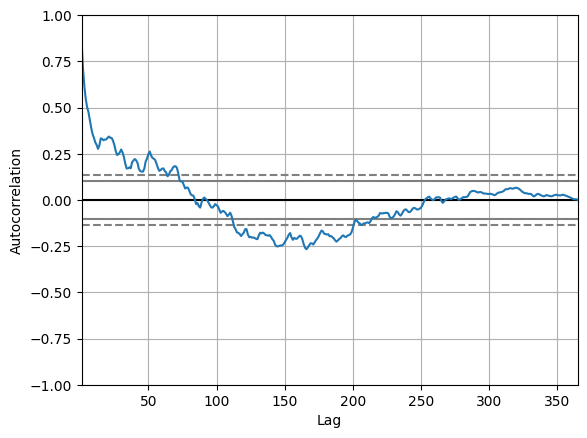

In [11]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

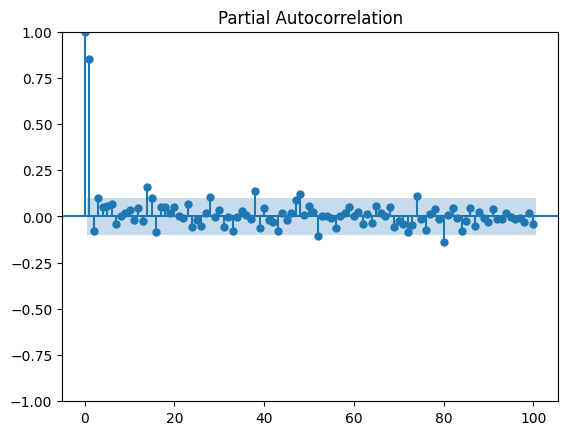

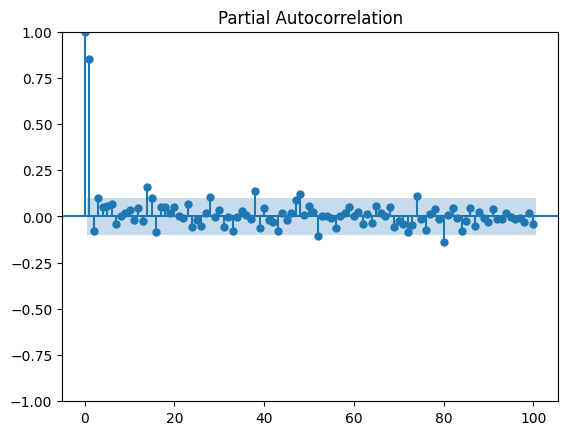

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)

**SARIMA MODEL TRAINING**

In [13]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.517
Date:                            Tue, 25 Mar 2025   AIC                           7919.033
Time:                                    05:38:52   BIC                           8000.170
Sample:                                         0   HQIC                          7951.322
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1884      6.915      0.027      0.978     -13.364      13.741
ar.L2          0.4757      6.430   

In [14]:
predictions = model.predict(len(data), len(data)+100)

trace_train = go.Scatter(x=data.index,
                         y=data["Instagram reach"],
                         mode="lines",
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index,
                        y=predictions,
                        mode="lines",
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions",
                   xaxis_title="Date",
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()

Instagram reach prediction is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors.